In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np 

In [8]:
with open("nietzsche.txt", "r", encoding="utf8") as f:
    text = f.read().lower()

print(len(text))

600901


In [9]:
lines = text.split("\n")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
num_words = len(tokenizer.word_index) + 1

input_sequences = []

for line in lines:
	tokens = tokenizer.texts_to_sequences([line])[0]

	for i in range(1, len(tokens)):
		input_sequences.append(tokens[:i+1])

max_sequence_len = max([len(i) for i in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

np.random.shuffle(input_sequences)

X, y = input_sequences[:,:-1], np.expand_dims(input_sequences[:,-1], axis=1)

In [10]:
X.shape

(92321, 16)

In [11]:
y.shape

(92321, 1)

In [12]:
num_words

10262

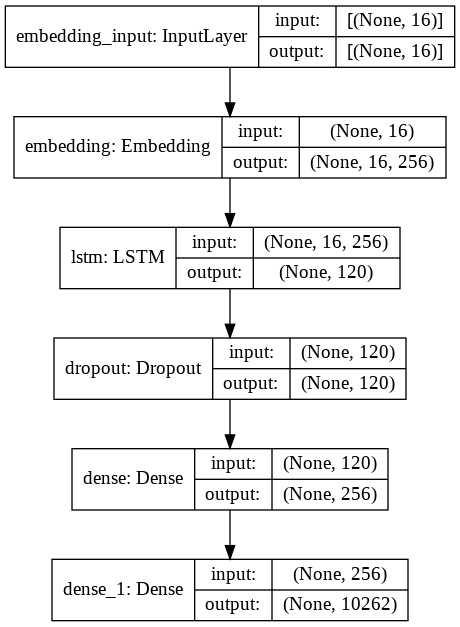

In [13]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

emb_size = 256

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, emb_size, input_length=max_sequence_len - 1),
    tf.keras.layers.LSTM(120),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(units=num_words, activation='softmax')
]) 

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer="adam", metrics=['accuracy'])

plot_model(model, show_shapes=True)
#model.summary()


In [14]:
callback = EarlyStopping(monitor="loss", patience=3)
history = model.fit(X, y, epochs=50, batch_size=128, verbose=1, callbacks=[callback])

Epoch 1/50
722/722 [==============================] - 44s 43ms/step - loss: 6.9443 - accuracy: 0.0695
Epoch 2/50
722/722 [==============================] - 31s 43ms/step - loss: 6.0520 - accuracy: 0.1179
Epoch 3/50
722/722 [==============================] - 31s 43ms/step - loss: 5.7537 - accuracy: 0.1403
Epoch 4/50
722/722 [==============================] - 32s 44ms/step - loss: 5.4787 - accuracy: 0.1573
Epoch 5/50
722/722 [==============================] - 31s 43ms/step - loss: 5.2476 - accuracy: 0.1729
Epoch 6/50
722/722 [==============================] - 31s 43ms/step - loss: 4.9923 - accuracy: 0.1844
Epoch 7/50
722/722 [==============================] - 31s 43ms/step - loss: 4.7405 - accuracy: 0.2007
Epoch 8/50
722/722 [==============================] - 31s 43ms/step - loss: 4.4548 - accuracy: 0.2211
Epoch 9/50
722/722 [==============================] - 31s 43ms/step - loss: 4.1883 - accuracy: 0.2432
Epoch 10/50
722/722 [==============================] - 31s 43ms/step - loss: 3.895

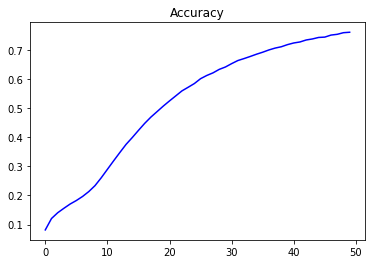

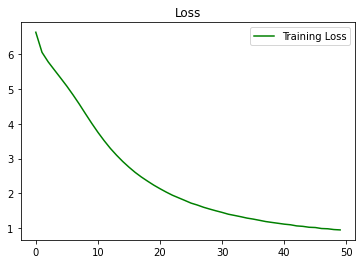

In [15]:
import matplotlib.pyplot as plt

epochs = range(50)

plt.plot(epochs, history.history['accuracy'], 'b', label='Training accuracy')
plt.title('Accuracy')

plt.figure()

plt.plot(epochs, history.history['loss'], 'g', label='Training Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [19]:
text = "The philosophy of the dogmatists, it is to be hoped, was only a promise for thousands of years afterwards"
next_words = 100
  
for _ in range(next_words):
	tokens = tokenizer.texts_to_sequences([text])[0]
	tokens = pad_sequences([tokens], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(tokens, verbose=0), axis=-1)
 
	output_word = ""

	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break

	text += " " + output_word

print(text)

The philosophy of the dogmatists, it is to be hoped, was only a promise for thousands of years afterwards as was in the end is to be understood the much of an impulse or other to divine long dangerous to those extraordinary vividness entire communities and even like his power and inscribes away for he live too far as the one who has the saints to both of things who for them the laisser aller every yes one is the party to grief and wait is not to find it in that innocent to we free spirits and eat out of this world to philosophers perhaps they are not yet not in need of it so that not even
